# Probabilidad Frecuentista

Podemos aproximar la probabilidad de sacar 4 con un dado justo.
Usamos el código del notebook [EP1_ExperimentosAleatorios](https://github.com/eliasegn/ProbabilidadI/blob/main/EP1_ExperimentosAleatorios.ipynb)

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

def elegirde(lista):
  '''
  Parámetros
  lista : lista de donde elegirá uno aleatoriamente
  '''
  n = len(lista) # Longitud de la lista
  division = np.linspace(0,1,n+1) # Partición del [0,1] de n espacios
  u = random.random() # Número aleatorio entre 0 y 1
  k = None # Valor a elegir
  for i in range(len(division)):
    if division[i] <= u < division[i+1]: # Elegimos dependiendo de la partición
      k = i # k será el índice donde cayó el número aleatorio
  return lista[k]

dado = [1,2,3,4,5,6]
elegirde(dado)

3

Podemos repetir este proceso muchas veces y contar los casos favorables.

In [ ]:
iter = 10 # El número de iteraciones
for i in range(iter):
  print(elegirde(dado))

3
3
3
2
6
3
2
3
2
3


Pensaremos en una aproximación a los casos favorables entre los casos totales como lo que sigue:

$$\mathbb{P}(\text{Sale 4}) \approx \frac{\text{El número de veces que salió 4 en la simulación}}{\text{El número de iteracioes}}$$

In [ ]:
iter = 100 # El número de iteraciones
contador4 = 0 # El contador
for i in range(iter):
  if elegirde(dado) == 4: # Si sale 4, agregamos al contador
    contador4 += 1

print('La aproximación es', contador4 / iter)

La aproximación es 0.17


Podemos hacer esto con cualquier otro número del dado

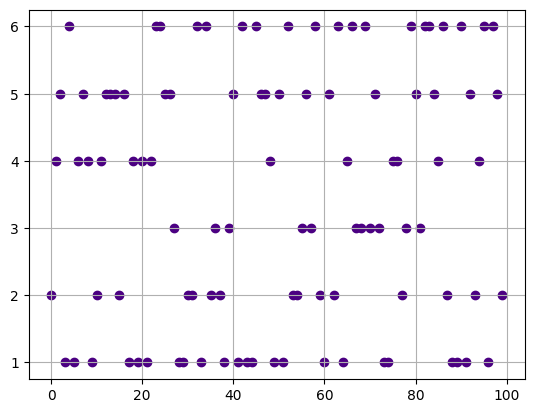

In [ ]:
contador1 = 0
contador2 = 0
contador3 = 0
contador5 = 0
contador6 = 0
lanzamientos = []

for i in range(iter):
  lanzamiento = elegirde(dado)
  dado = [1,2,3,4,5,6]
  if lanzamiento == 1:
    contador1 += 1
  elif lanzamiento == 2:
    contador2 += 1
  elif lanzamiento == 3:
    contador3 += 1
  elif lanzamiento == 4:
    contador4 += 1
  elif lanzamiento == 5:
    contador5 += 1
  elif lanzamiento == 6:
    contador6 += 1
  lanzamientos.append(lanzamiento)

dominio2 = range(iter)

# Graficamos los resultados
plt.figure()
plt.scatter(dominio2, lanzamientos, color = 'indigo')
plt.grid()
plt.show()


### Histogramas

Un histograma es un tipo de gráfico que muestra la frecuencia de cada uno de los resultados del experimento por medio de barras.

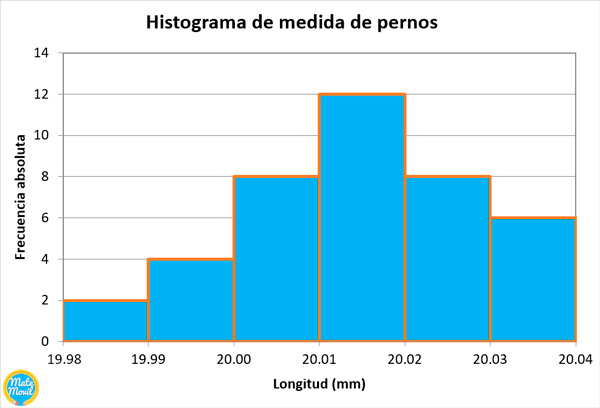

En este ejemplo tenemos que la mayoría de perros miden entre $20.01$ y $20.02$, mientras que los que menos hay son de entre $19.98$ y $20.04$. Usaremos histogramas para ver los resultados de tirar un dado.

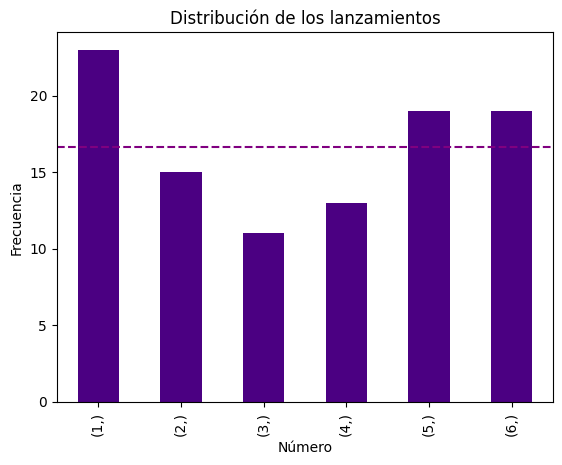

In [ ]:
# Definimos un df con el número y las veces que fue lanzado
lanzamientos = pd.DataFrame(lanzamientos)

# Contamos el número de veces que aparece cada número
conteos = lanzamientos.value_counts().sort_index()

# Graficamos
plt.figure()
conteos.plot(kind='bar', color='indigo')
plt.axhline(y = 0.1666*iter, linestyle = '--', color = 'purple')
plt.title('Distribución de los lanzamientos')
plt.xlabel('Número')
plt.ylabel('Frecuencia')
plt.show()

Juntamos todo en un gran código para poder trabajar con él

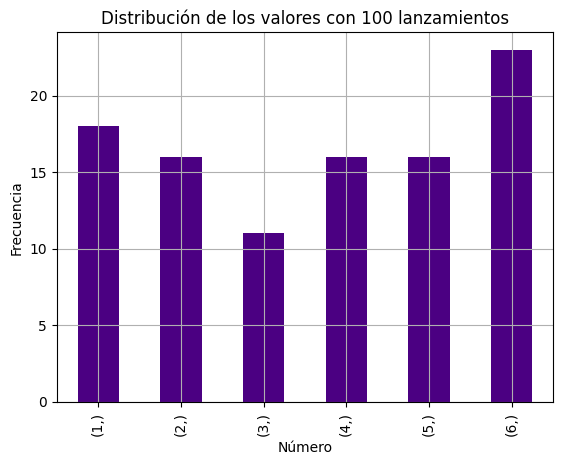

In [ ]:
iter = 100 # El número de iteraciones

# Definimos contadores para cada valor del dado
contador1 = 0
contador2 = 0
contador3 = 0
contador4 = 0
contador5 = 0
contador6 = 0

lanzamientos = [] # Lista de lanzamientos

for i in range(iter):
  lanzamiento = elegirde(dado) # Lanzamos el dado
  if lanzamiento == 1:
    contador1 += 1
  elif lanzamiento == 2:
    contador2 += 1
  elif lanzamiento == 3:
    contador3 += 1
  elif lanzamiento == 4:
    contador4 += 1
  elif lanzamiento == 5:
    contador5 += 1
  elif lanzamiento == 6:
    contador6 += 1
  lanzamientos.append(lanzamiento)

dominio = range(iter)

# Definimos un df con el número y las veces que fue lanzado
lanzamientos = pd.DataFrame(lanzamientos)

# Contamos el número de veces que aparece cada número
conteos = lanzamientos.value_counts().sort_index()

# Graficamos
plt.figure()
conteos.plot(kind='bar', color='indigo')
#plt.axhline(y = 0.1666*iter, linestyle = '--', color = 'purple')
plt.title(f'Distribución de los valores con {iter} lanzamientos')
plt.xlabel('Número')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()


Para aproximar la probabilidad, contaremos el número de veces que ocurrió nuestro evento y lo dividiremos entre el número de veces que hicimos el experimento.

**Pseudo-Código para calcular la probabilidad de un experimento con enfoque frecuentista**

Dado un evento $A$, nos interesa aproximar a $\mathbb{P}(A)$.

1. Fijar $N \in \mathbb{N}$ un número (grande) de iteraciones.
2. Inicializar una variable para contar $\texttt{contador}$.
3. Realizamos nuestro experimento $N$ veces. Por cada vez, si ocurre A, entonces $\texttt{contador = contador + 1}$. Si no, continuamos.
4. Calculamos $\frac{\texttt{contador}}{\texttt{N}}$ y éste valor será nuestra aproximación a $\mathbb{P}(A)$.

### Ejemplo de Aplicación

Un profesor entrega a su clase un conjunto de 10 ejercicios y comunica que **5 de ellos serán escogidos aleatoriamente** para formar el examen final.

Si un estudiante decide **preparar únicamente 7 de los 10 ejercicios**, ¿cuál es la probabilidad de que:

**(a)** Conteste correctamente los **5 ejercicios** del examen final.  

**(b)** Conteste correctamente **al menos 4 ejercicios** del examen final.


Veamos el inciso **(a)**

In [ ]:
ejercicios = [1,2,3,4,5,6,7,8,9,10] # número de ejercicios
N = 100000 # número de iteraciones
indicadora = 0 # contador

for i in range(N):
  estudiados = random.sample(ejercicios, 7)
  elegidos = random.sample(ejercicios, 5)
  # Calculamos el cardinal de la intersección
  bien = len(set(estudiados) & set(elegidos))
  if bien == 5: # Si el cardinal es 5, agregamos
      indicadora += 1

print(indicadora/N)

0.08345


Veamos el inciso **(b)**

In [ ]:
indicadora2 = 0 # contador

for i in range(N):
  estudiados = random.sample(ejercicios, 7)
  elegidos = random.sample(ejercicios, 5)
  # Calculamos el cardinal de la intersección
  bien = len(set(estudiados) & set(elegidos))
  if bien == 5 or bien == 4: # Si el cardinal es 5, agregamos
      indicadora2 += 1

print(indicadora2/N)

0.50074
